# Deep Multiple Instance Learning (MIL) with Attention mechanism

In multiple instance learning, one tries to learn from weakly annotated data in which only a class label is given for a "bag" of instances.

Keras implementation (translated from Pytorch) of the paper:

Ilse, M., Tomczak, J. M., & Welling, M. (2018). [Attention-based Deep Multiple Instance Learning. arXiv preprint arXiv:1802.04712](https://arxiv.org/pdf/1802.04712.pdf)

Original code by Maximilian Ilse (ilse.maximilian@gmail.com) and Jakub M. Tomczak (jakubmkt@gmail.com). Original repo: https://github.com/AMLab-Amsterdam/AttentionDeepMIL


### Note on keras

You will need to patch keras to allow for the number of targets to differ from the number of samples. To disable the consistency check, you need to add a `check_array_lengths` condition in `_standardize_user_data`. 

`keras/engine/training.py (line 805)`:
```
if check_array_lengths:
    check_array_length_consistency(x, y, sample_weights)
```

See keras [pull request 11548](https://github.com/keras-team/keras/pull/11548).

In [1]:
%load_ext autoreload
%autoreload 2
import os, sys
import numpy as np

# import src
src_folder = '../src'
if src_folder not in sys.path:
    sys.path.append(src_folder)
import models, dataloader



In [2]:
#for batch_idx, (bag, label) in enumerate(train_loader):
#    print(batch_idx, bag.shape, label[0])

In [3]:
target_number = 5

In [4]:
model = models.AttentionMIL(target_number=target_number, gating=True, bag_size_mean=20, bag_size_var=5)

K.int_shape(H) = (None, 500) # NxL
K.int_shape(At) = (None, 1) # KxN
K.int_shape(As) = (None, 1) # KxN
K.int_shape(A) = (1, None) # KxN
K.int_shape(x) = (1, 500) # KxL
K.int_shape(Y_prob) = (1, 1) # 1
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 24, 24, 50)   1300        input_1[0][0]                    
__________________________________________________________________________________________________
activation_2 (Activation)       (None, 24, 24, 50)   0           conv2d_2[0][0]                   
__________________________________________________________________________________________________
max_poo

In [5]:
#y_prob, y_hat, attention = model.forward(np.random.random((10,28,28,1)))
#print(y_prob)
#print(y_hat)
#print(attention)

In [9]:
model.train(epochs=12)

..........................................................................................................................................................................................................................................................
epoch: 1	loss: 0.5641628389880061	accuracy: 0.776
..........................................................................................................................................................................................................................................................
epoch: 2	loss: 0.42645622852724047	accuracy: 0.784
..........................................................................................................................................................................................................................................................
epoch: 3	loss: 0.3087269758253824	accuracy: 0.868
................................................................................................

# Test

In [10]:
model.get_data(target_number=target_number)

In [18]:
def plot_results(x, y_pred, attention, threshold=1e-5):
    %matplotlib inline
    import matplotlib.pyplot as plt
    n = int(np.ceil(np.sqrt(len(x))))
    fig, ax = plt.subplots(n,n,figsize=(6,6))
    fig.tight_layout()
    ax = ax.flatten()
    attention = np.squeeze(attention)
    fig.suptitle(f'Contains number {target_number} = {y_pred}', y=1.1)
    for i, im in enumerate(x):
        if y_pred:
            ax[i].set_title(f'{attention[i]:.6f}')
        if y_pred and attention[i] > threshold :
            ax[i].imshow(np.squeeze(im), cmap='gray')
        else:
            ax[i].imshow(np.squeeze(im), cmap='gray_r')
        ax[i].axis('off')
    
    for a in ax[i+1:]: a.set_visible(False)
    
    fig.savefig(f'../output/prediction_{target_number}_{int(np.random.random()*100000):06d}.png')
    
    plt.show()

(28, 28, 28, 1)


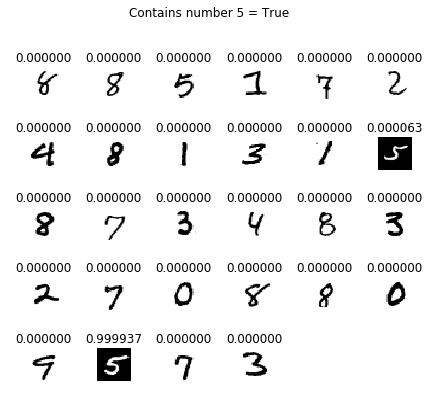

(16, 28, 28, 1)


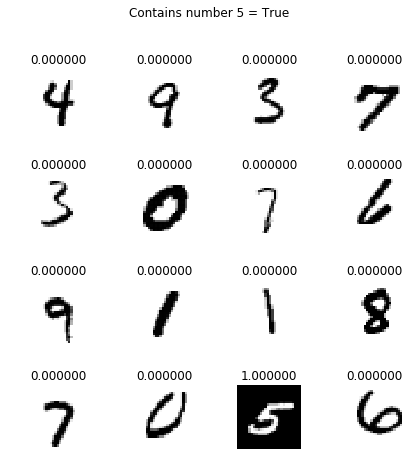

(17, 28, 28, 1)


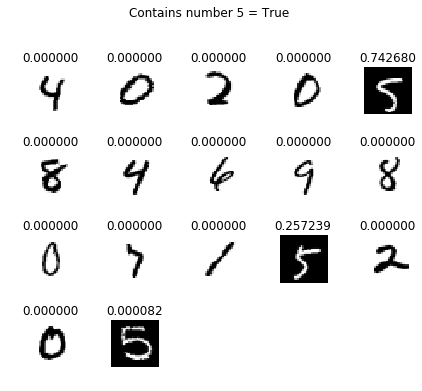

(14, 28, 28, 1)


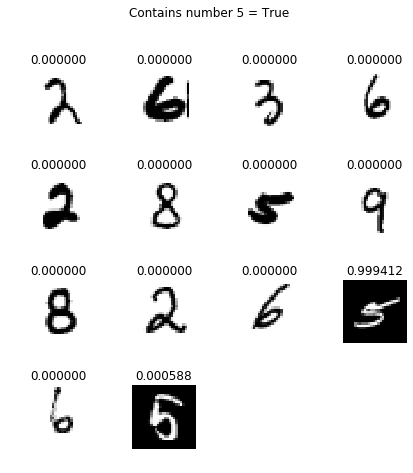

(24, 28, 28, 1)


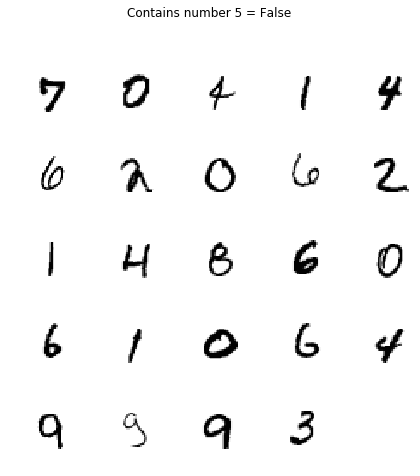

(8, 28, 28, 1)


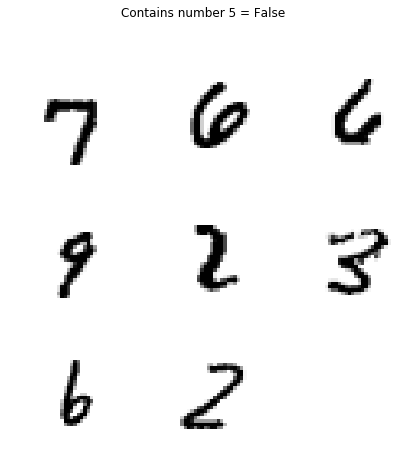

(28, 28, 28, 1)


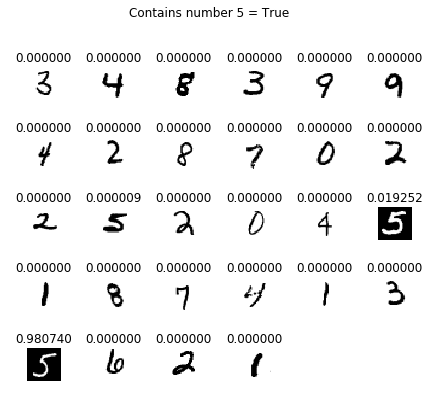

(16, 28, 28, 1)


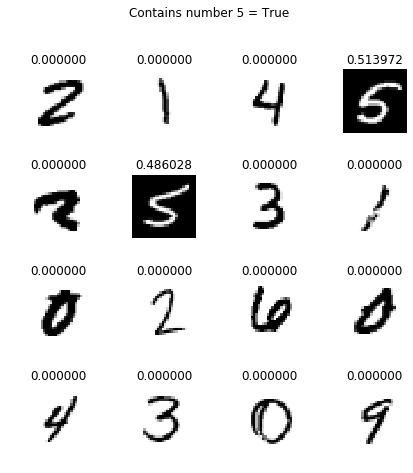

(21, 28, 28, 1)


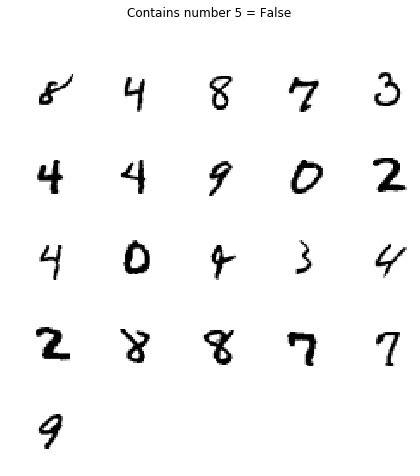

(18, 28, 28, 1)


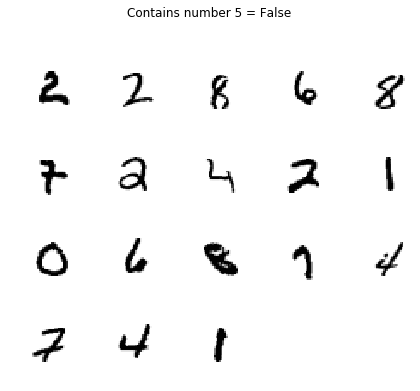

(27, 28, 28, 1)


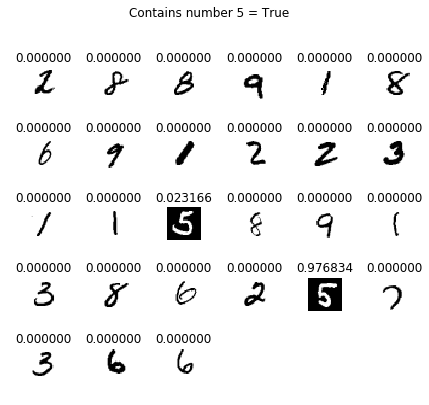

(9, 28, 28, 1)


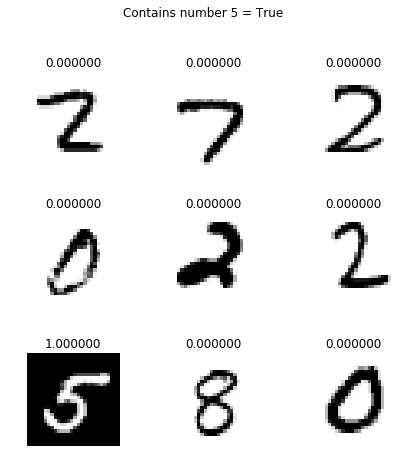

(18, 28, 28, 1)


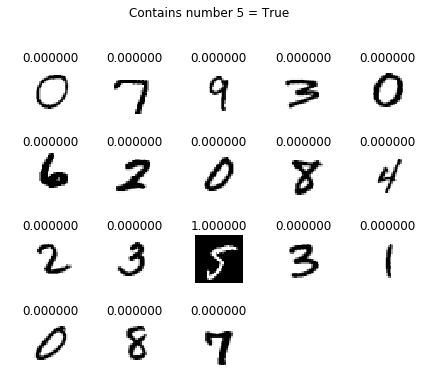

(18, 28, 28, 1)


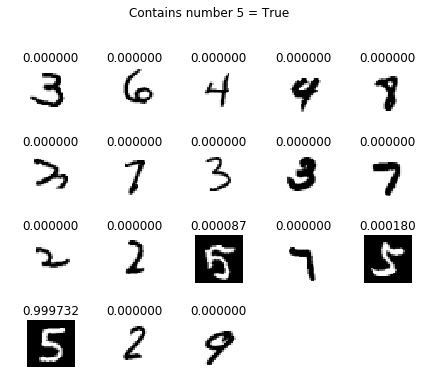

(25, 28, 28, 1)


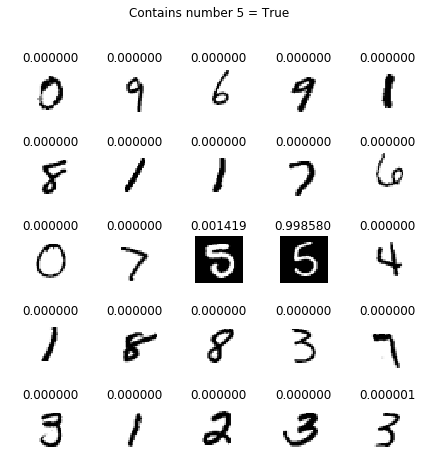

(14, 28, 28, 1)


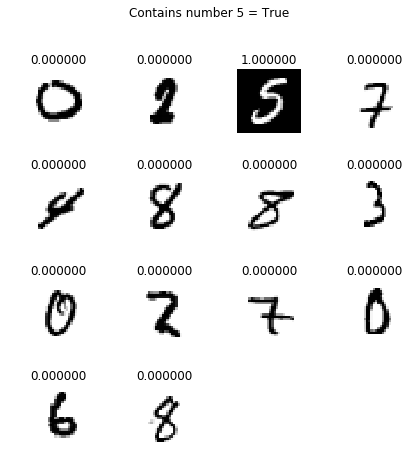

(19, 28, 28, 1)


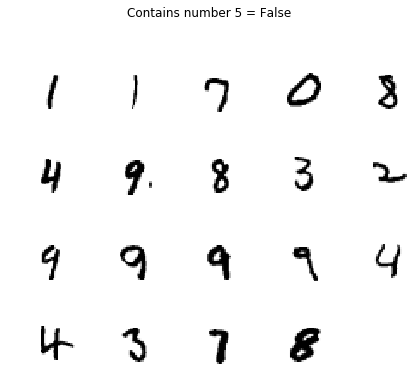

(15, 28, 28, 1)


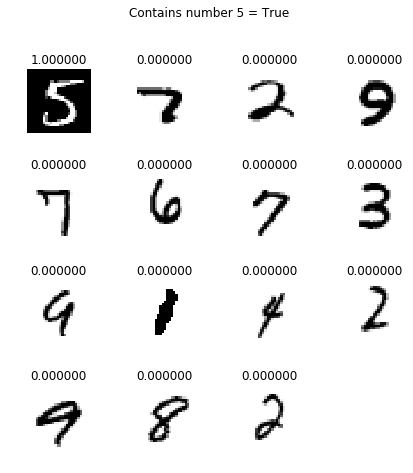

(20, 28, 28, 1)


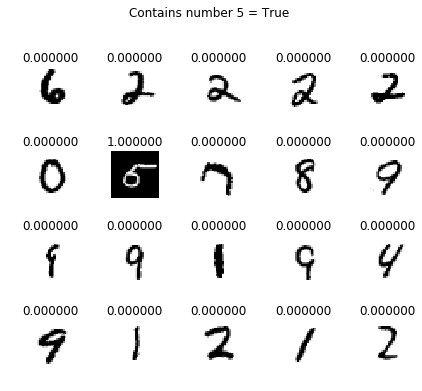

(22, 28, 28, 1)


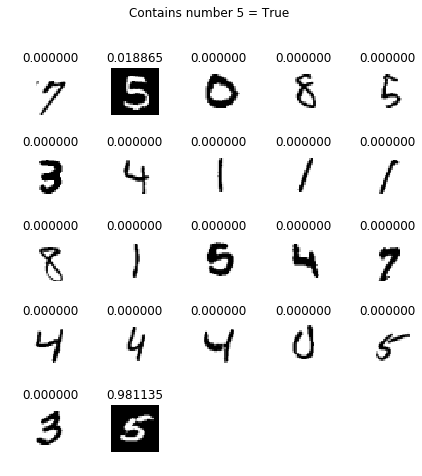

(14, 28, 28, 1)


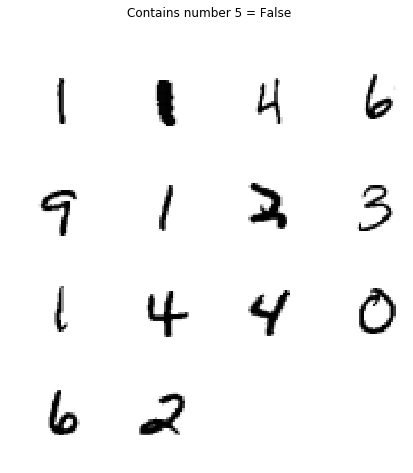

(25, 28, 28, 1)


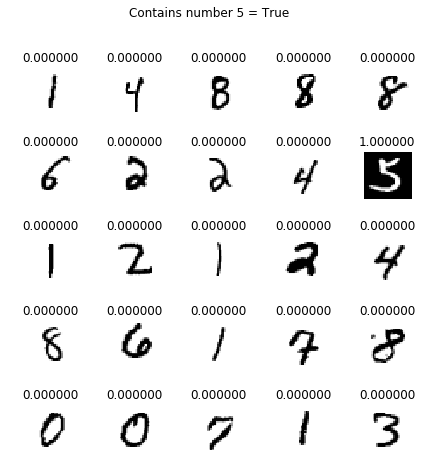

(24, 28, 28, 1)


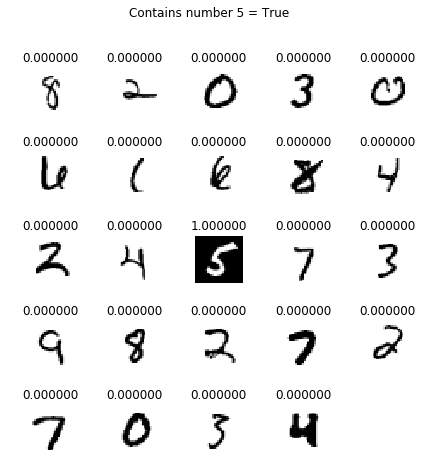

(22, 28, 28, 1)


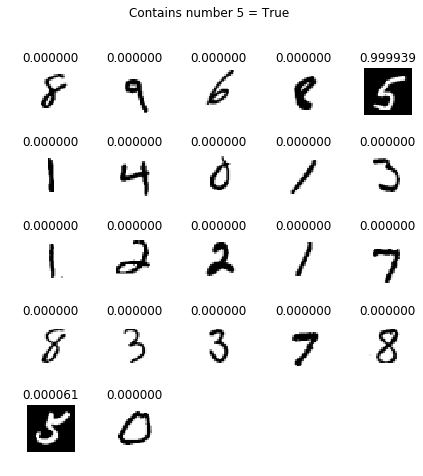

(24, 28, 28, 1)


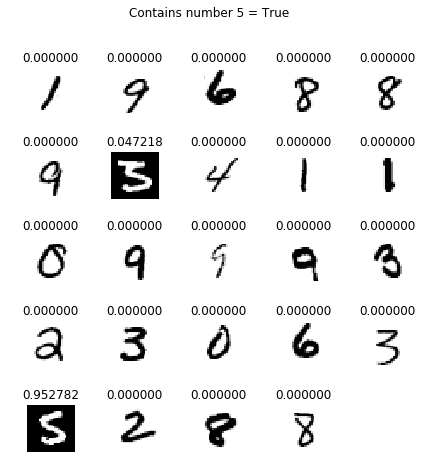

(16, 28, 28, 1)


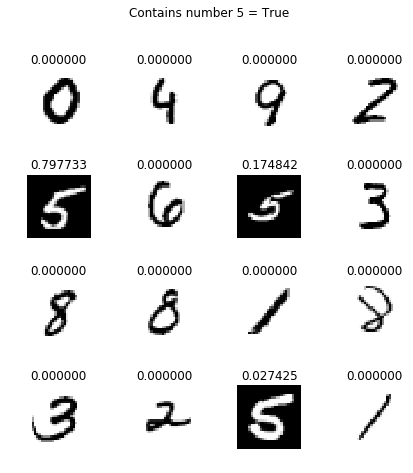

(19, 28, 28, 1)


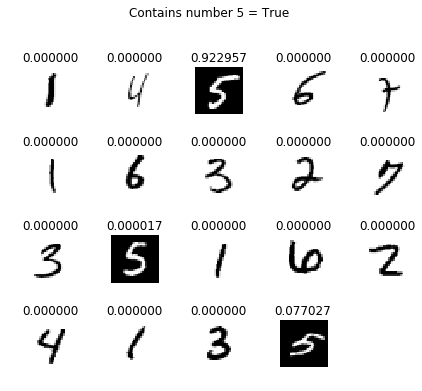

(15, 28, 28, 1)


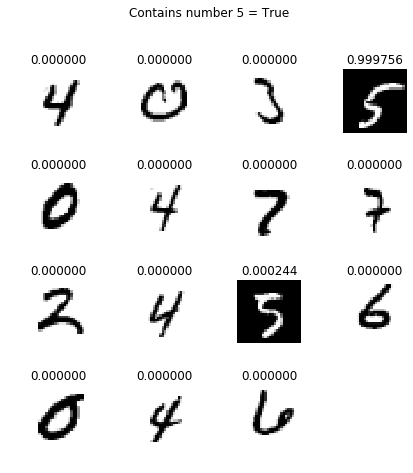

(18, 28, 28, 1)


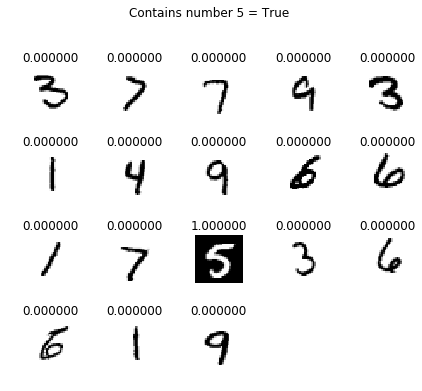

(22, 28, 28, 1)


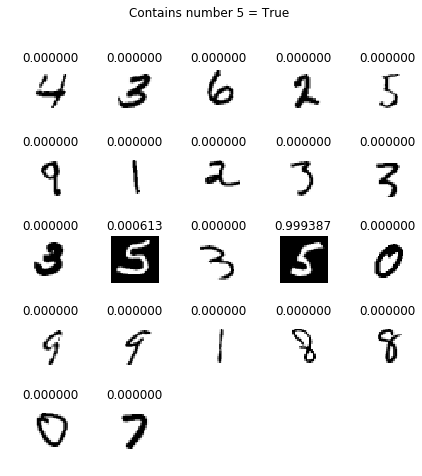

(16, 28, 28, 1)


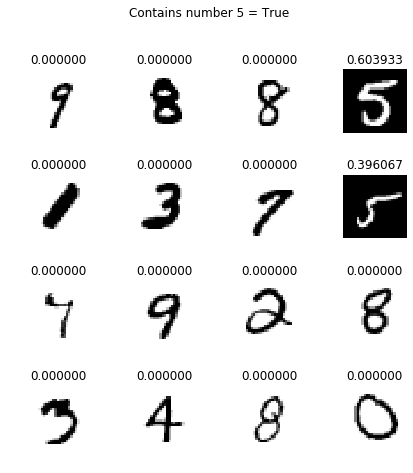

(18, 28, 28, 1)


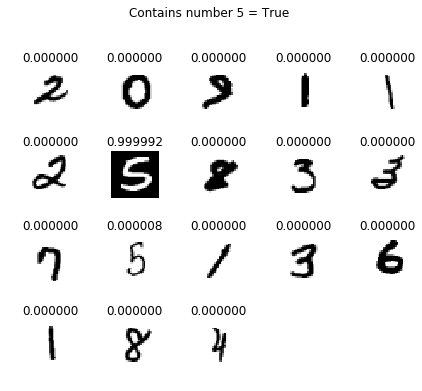

(16, 28, 28, 1)


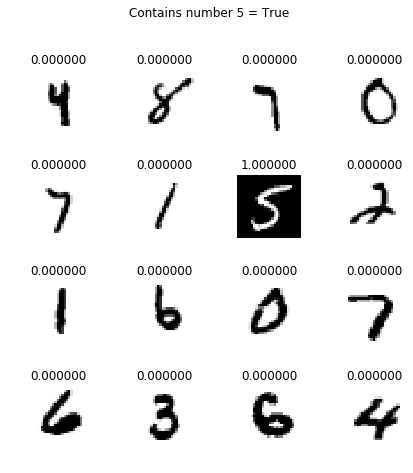

(15, 28, 28, 1)


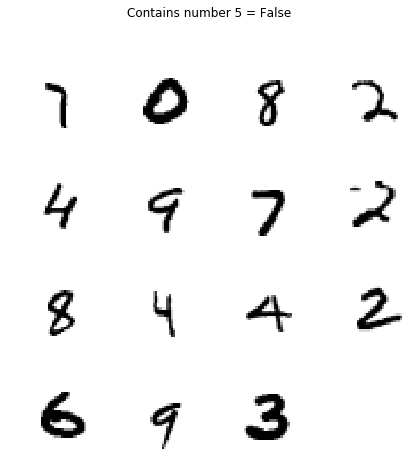

(16, 28, 28, 1)


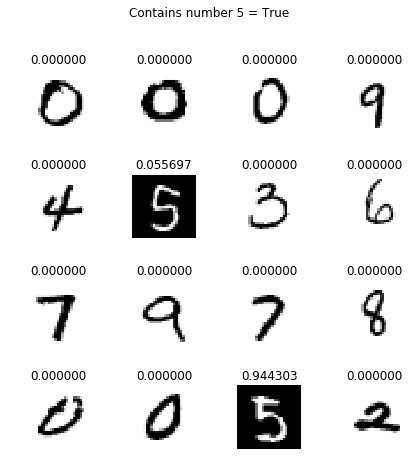

(19, 28, 28, 1)


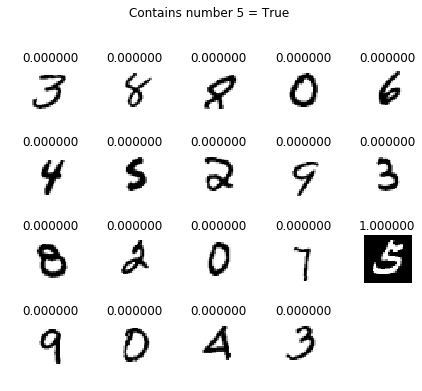

(14, 28, 28, 1)


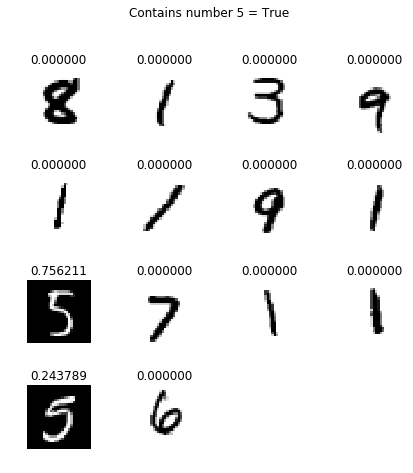

(21, 28, 28, 1)


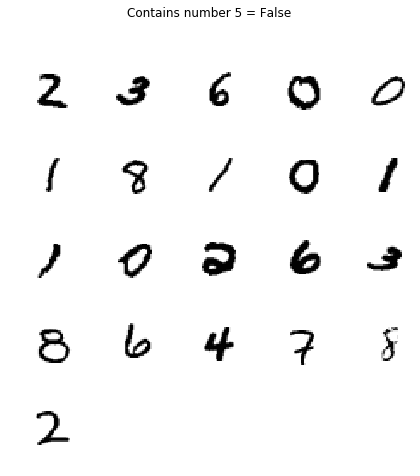

(28, 28, 28, 1)


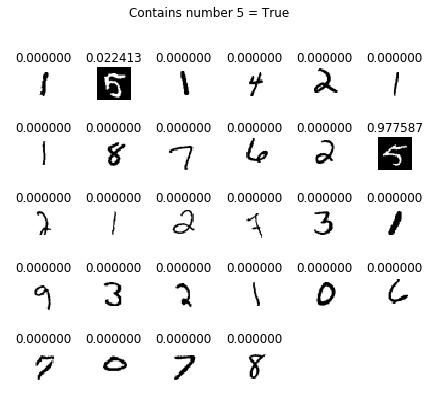

(23, 28, 28, 1)


SystemError: <built-in method write of _io.BufferedWriter object at 0x7f4020541728> returned a result with an error set

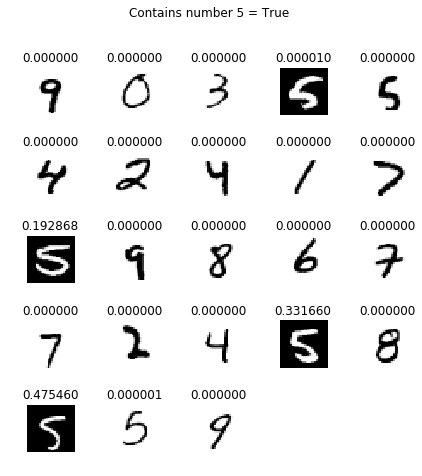

In [19]:
for batch_idx, (x, y) in enumerate(model.test_loader):
    
    y_prob, y_hat, attention = model.forward(x)
    #print(y_prob)
    #print(y_hat)
    #print(attention)
    plot_results(x, y_hat, attention)
    
    